# YOLO 資料格式轉換實作

在 4.1 節中已了解到 YOLO 的資料格式，在這一小節中將要來實際操作，把其他的資料格式轉換成 YOLO 的格式。

# VOC xml 格式 -> YOLO 格式

首先來試著轉換 VOC xml 的格式，VOC xml 格式中 bounding box 的表示為 xmin, ymin, xmax, ymax，分別為 x, y 座標的最小與最大值，也就是左上角和右下角的座標位置。

In [ ]:
from bs4 import BeautifulSoup
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
with open('cat.xml', 'r') as f:
  soup = BeautifulSoup(f.read(), 'xml')

In [ ]:
soup

* 從資料中取出圖片大小和 bounding box (xmin, ymin, xmax, ymax)

In [ ]:
size = soup.select('size')[0]
img_w = int(size.select_one('width').text)
img_h = int(size.select_one('height').text)

print("img_w:", img_w)
print("img_h:", img_h)

obj = soup.select('object')[0]
xmin = int(obj.select_one('xmin').text)
ymin = int(obj.select_one('ymin').text)
xmax = int(obj.select_one('xmax').text)
ymax = int(obj.select_one('ymax').text)

print("xmin:", xmin)
print("ymin:", ymin)
print("xmax:", xmax)
print("ymax:", ymax)


img_w: 3024
img_h: 4302
xmin: 449
ymin: 673
xmax: 2417
ymax: 3341


* 將剛剛取出的 bounding box 畫在圖片上，看看是否正確

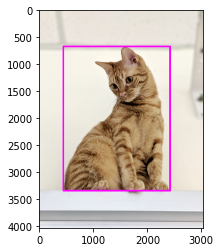

In [ ]:
img = cv2.imread('cat.jpg')
cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 255), 30)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

* 接下來就可以開始進行 YOLO 格式的轉換囉!! 以下是轉換 YOLO 格式的公式

<img src="https://imgur.com/pqO180v.png" width=250/>



In [ ]:
dw = 1./img_w
dh = 1./img_h
x_center = ((xmin + xmax) /2) * dw
y_center = ((ymin + ymax)/2) * dh
w_yolo = (xmax-xmin) * dw
h_yolo = (ymax-ymin) * dh

print("x_center:", x_center)
print("y_center:", y_center)
print("w_yolo:", w_yolo)
print("h_yolo:", h_yolo)

x_center: 0.47387566137566134
y_center: 0.46652719665271963
w_yolo: 0.6507936507936507
h_yolo: 0.6201766620176662


* 將 xml 中的所有資料進行轉換後存檔

若有很多筆資料，可以使用以下程式碼將所有資料轉換為 YOLO 格式後存檔。

In [ ]:
yolo_path = 'save'
if not os.path.exists(yolo_path):
  os.makedirs(yolo_path)

data_counter = 0
all_classes = {'cat': 0}
img_info = []

for size in soup.select('size'):
  img_w = int(size.select_one('width').text)
  img_h = int(size.select_one('height').text)
    
for obj in soup.select('object'):
  xmin = int(obj.select_one('xmin').text)
  ymin = int(obj.select_one('ymin').text)
  xmax = int(obj.select_one('xmax').text)
  ymax = int(obj.select_one('ymax').text)
  objclass = all_classes.get(obj.select_one('name').text)

  # convert yolo type
  dw = 1./img_w
  dh = 1./img_h
  x_center = ((xmin + xmax) /2) * dw
  y_center = ((ymin + ymax)/2) * dh
  w_yolo = (xmax-xmin) * dw
  h_yolo = (ymax-ymin) * dh

  img_info.append(' '.join([str(objclass), str(x_center),str(y_center),str(w_yolo),str(h_yolo)]))

  with open(os.path.join(yolo_path, 'voc_' + str(data_counter) + '.txt'), 'a+') as f:
    f.write('\n'.join(img_info))

# COCO dataset 格式 -> YOLO 格式

下一步，來試著轉換 COCO dataset 格式吧! COCO dataset 格式中 bounding box 的表示為 xmin, ymin, width, height，xmin, ymin為 x, y 座標的最小值，也就是左上角和右下角的座標位置、width, height 為 bounding box 的寬高。

In [ ]:
!gdown --id 1Hgt_3q1NwKEvBbyrfVs57nfOLYScliZi -O cat.json

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Hgt_3q1NwKEvBbyrfVs57nfOLYScliZi
To: /content/cat.json
100% 505/505 [00:00<00:00, 802kB/s]


In [ ]:
import json

In [ ]:
with open("cat.json", "r") as f:
  json_data = json.load(f)

In [ ]:
json_data

{'info': {'description': 'Cat Dataset',
  'url': 'url',
  'version': '1.0',
  'year': 2022,
  'contributor': 'Ching I',
  'date_created': '2022/11/30'},
 'image': [{'license': 2,
   'file_name': 'cat.jpg',
   'height': 4302,
   'width': 3024,
   'date_captured': '2022-11-31 12:00:00',
   'id': 1}],
 'annotations': [{'image_id': 1,
   'bbox': [449, 673, 1968, 2668],
   'category_id': 1,
   'id': 1}],
 'categories': [{'supercategory': 'animal', 'id': 1, 'name': 'cat'}]}

* 從資料中取出圖片大小和 bounding box (xmin, ymin, width, height)

In [ ]:
img_w = json_data['image'][0]['width']
img_h = json_data['image'][0]['height']

print("img_w:", img_w)
print("img_h:", img_h)

img_w: 3024
img_h: 4302


In [ ]:
xmin, ymin, bbox_w, bbox_h = json_data['annotations'][0]['bbox']

print("xmin:", xmin)
print("ymin:", ymin)
print("bbox_w:", bbox_w)
print("bbox_h:", bbox_h)

xmin: 449
ymin: 673
bbox_w: 1968
bbox_h: 2668


* 計算 bounding box 右下角的值 (xmax, ymax)

In [ ]:
xmax = int(xmin)+int(bbox_w)
ymax = int(ymin)+int(bbox_h)

print("xmax:", xmax)
print("ymax:", ymax)

xmax: 2417
ymax: 3341


* 將剛剛計算的 bounding box 畫在圖片上，看看是否正確

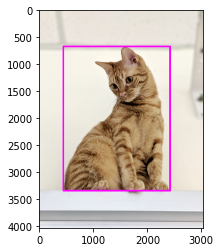

In [ ]:
img = cv2.imread('cat.jpg')
cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 255), 30)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

* 接下來就可以開始進行 YOLO 格式的轉換囉!! 以下是轉換 YOLO 格式的公式

<img src="https://imgur.com/pqO180v.png" width=250/>



In [ ]:
dw = 1./img_w
dh = 1./img_h
x_center = ((xmin + xmax)/2.0) *dw
y_center = ((ymin + ymax)/2.0) *dh
w_yolo = bbox_w*dw
h_yolo = bbox_h*dh

print("x_center:", x_center)
print("y_center:", y_center)
print("w_yolo:", w_yolo)
print("h_yolo:", h_yolo)

x_center: 0.47387566137566134
y_center: 0.46652719665271963
w_yolo: 0.6507936507936507
h_yolo: 0.6201766620176662


* 將 json 中的所有資料進行轉換後存檔

若有很多筆資料，可以使用以下程式碼將所有資料轉換為 YOLO 格式後存檔。

In [ ]:
yolo_path = 'save'
if not os.path.exists(yolo_path):
  os.makedirs(yolo_path)

data_counter = 0
img_info = []
with open("cat.json", "r") as f:
  json_data = json.load(f)

  for idx in range(len(json_data['image'])):
    data_image = json_data['image'][idx]
    img_w = data_image['width']
    img_h = data_image['height']
    print("img_w:", img_w)
    print("img_h:", img_h)

    data_annotations = json_data['annotations'][idx]
    xmin, ymin, bbox_w, bbox_h = data_annotations['bbox']
    xmax = int(xmin)+int(bbox_w)
    ymax = int(ymin)+int(bbox_h)

    # convert yolo type
    dw = 1./img_w
    dh = 1./img_h
    x_center = ((xmin + xmax)/2.0) *dw
    y_center = ((ymin + ymax)/2.0) *dh
    w_yolo = bbox_w*dw
    h_yolo = bbox_h*dh

    print("x_center:", x_center)
    print("y_center:", y_center)
    print("w_yolo:", w_yolo)
    print("h_yolo:", h_yolo)

    img_info.append(' '.join([str(objclass), str(x_center),str(y_center),str(w_yolo),str(h_yolo)]))

    with open(os.path.join(yolo_path, 'coco_' + str(data_counter) + '.txt'), 'a+') as f:
      f.write('\n'.join(img_info))


img_w: 3024
img_h: 4302
x_center: 0.47387566137566134
y_center: 0.46652719665271963
w_yolo: 0.6507936507936507
h_yolo: 0.6201766620176662
